In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import sklearn as sk
import joblib
import pickle

In [9]:
today_stf= '20241022'

In [10]:
df = pd.read_csv("predict_tavi_clean.csv",index_col=0)
df.head()

,gender,country,age,hospital_state,residential_loc_pre,race,insurance,cad,prior_acute_mi,prior_cardio_surg,...,days_12mth_fup,proc_los,discharge_status_new,fup_status_12mth_new,fup_status_30d_new,upper_bound,lower_bound,death_observed,death_in_study,bmi
ID,,,,,,,,,,,,,,,,,,,,,
1,1.0,12.0,80.0,3.0,1.0,1.0,2.0,1.0,0.0,1.0,...,372.0,3.0,1.0,1.0,1.0,inf,372.0,False,False,25.806452
2,1.0,12.0,82.0,3.0,1.0,1.0,2.0,0.0,0.0,1.0,...,NaN,2.0,1.0,NaN,1.0,inf,37.0,False,False,28.326580
3,2.0,12.0,86.0,3.0,2.0,1.0,2.0,1.0,0.0,1.0,...,NaN,2.0,1.0,NaN,1.0,inf,36.0,False,False,29.061224
4,2.0,12.0,81.0,3.0,2.0,1.0,2.0,0.0,0.0,1.0,...,NaN,5.0,1.0,NaN,1.0,inf,43.0,False,False,32.432432
5,2.0,12.0,91.0,3.0,2.0,1.0,2.0,1.0,0.0,1.0,...,NaN,2.0,1.0,NaN,1.0,inf,50.0,False,False,19.470778


In [11]:
columns = [
    "gender"
    ,"country"
    ,'age'
    ,'hospital_state'
    ,'residential_loc_pre'
    ,'race'
    ,'insurance'
    ,'cad'
    ,'prior_acute_mi'
    #,'prior_acute_mi_yes'
    ,'prior_cardio_surg'
    ,'prior_pci'
    ,'prior_cabg'
    ,'prior_valve_replace'
    ,'prior_tavi'
    ,'prior_bav'
    ,'prior_af'
    ,'prior_generator'
    ,'porcelain_aorta'
    ,'prior_ccf'
    ,'prior_stroke'
    ,'prior_tia'
    ,'prior_carotid_sten'
    ,'prior_pad'
    ,'smoker'
    ,'chronic_lung'
    ,'hostile_chest'
    ,'hypertension'
    ,'diabetes'
    ,'ckd'
    ,'dialysis'
    ,'prior_radiotherapy'
    ,'long_term_steroid'
    ,'meds_ACE_ARB'
    ,'meds_xa_inibitor'
    ,'meds_aspirin'
    ,'meds_p2y12'
    ,'meds_beta_blocker'
    ,'meds_warfarin'
    ,'meds_doac'
    ,'meds_statins'
    ,'meds_diuretics'
    ,'meds_none'
    ,'nyha_status'
    ,'kccq_summ_bl'
    ,'height'
    ,'weight'
    ,'haemoglobin'
    ,'platelet_count'
    ,'albumin'
    ,'creatinine'
    ,'inr'
    ,'egfr_pre'
    ,'fev1'
    ,'ecg_rhythm_sinus'
    ,'ecg_rhythm_Fib_flutter'
    ,'ecg_rhythm_Fibrillation'
    ,'ecg_rhythm_flutter'
    ,'ecg_rhythm_paced'
    ,'ecg_rhythm_junctional'
    ,'ecg_conduct_none'
    ,'ecg_conduct_RBBB'
    ,'ecg_conduct_LBBB'
    ,'ecg_conduct_1DAVBlock'
    ,'ecg_conduct_2DAVBlock'
    ,'ecg_conduct_3DAVBlock'
    ,'ecg_conduct_Paced'
    ,'diseased_vessels_number'
    ,'lm_sten'
    ,'prox_lad'
    ,'rv_systolic'
    ,'lvef_value'
    ,'lvef_value_scale'
    ,'lv_internal_sys_dim_value'
    ,'lv_internal_dia_dim_value'
    ,'septal_wall'
    ,'posterior_wall'
    ,'av_peak_vel'
    ,'av_mean_grad_tte'
    ,'av_area_tte'
    ,'dp_index_tte_pre'
    ,'aortic_insuff'
    ,'mitral_regurg'
    ,'av_disease_etiology'
    ,'annulus_max_dim'
    ,'annulus_min_dim'
    ,'perimeter'
    ,'annulus_area_ctaort'
    ,'st_junc_diam'
    ,'valve_calc'
    ,'annualar_calc_ctaort'
    ,'valve_morph'
    ,'aortic_sinus_dim_left'
    ,'aortic_sinus_dim_right'
    ,'aortic_sinus_dim_non_coron'
    ,'ascending_ao'
    ,'lmca_height'
    ,'rca_height'
    ,'iliac_mld_left'
    ,'iliac_mld_right'
    ,'femoral_mld_left'
    ,'femoral_mld_right'
    ,'artery_calc'
    ,'iliofem_tort'
    ,'high_cfa_burif'
    #,'high_cfa_burif_yes'
    ,'prev_iliofem_interv'
    #,'prev_iliofem_interv_yes'
    ,'procedure_indic'
    #,'bio_valve_fail_reason'
    ,'valve_in_valve'
    ,'anaesthesia'
    ,'access_site'
    ,'access_method'
    ,'initial_bav'
    ,'device_manufacturer_1'
    ,'device_model_1'
    ,'discharge_status_new'
    ,'fup_status_30d_new'
    ,'fup_status_12mth_new'
    ,'days_death'
        ,'LOS'
    ,'days_30d_fup'
    ,'days_12mth_fup'
    ,'death_in_study'
]


    
categorical_col = [
    "gender"
    ,"country"
    ,'hospital_state'
    ,'residential_loc_pre'
    ,'race'
    ,'insurance'
    ,'cad'
    ,'prior_acute_mi'
    #,'prior_acute_mi_yes'
    ,'prior_cardio_surg'
    ,'prior_pci'
    ,'prior_cabg'
    ,'prior_valve_replace'
    ,'prior_tavi'
    ,'prior_bav'
    ,'prior_af'
    ,'prior_generator'
    ,'porcelain_aorta'
    ,'prior_ccf'
    ,'prior_stroke'
    ,'prior_tia'
    ,'prior_carotid_sten'
    ,'prior_pad'
    ,'smoker'
    ,'chronic_lung'
    ,'hostile_chest'
    ,'hypertension'
    ,'diabetes'
    ,'ckd'
    ,'dialysis'
    ,'prior_radiotherapy'
    ,'long_term_steroid'
    ,'meds_ACE_ARB'
    ,'meds_xa_inibitor'
    ,'meds_aspirin'
    ,'meds_p2y12'
    ,'meds_beta_blocker'
    ,'meds_warfarin'
    ,'meds_doac'
    ,'meds_statins'
    ,'meds_diuretics'
    ,'meds_none'
    ,'nyha_status'
    ,'ecg_rhythm_sinus'
    ,'ecg_rhythm_Fib_flutter'
    ,'ecg_rhythm_Fibrillation'
    ,'ecg_rhythm_flutter'
    ,'ecg_rhythm_paced'
    ,'ecg_rhythm_junctional'
    ,'ecg_conduct_none'
    ,'ecg_conduct_RBBB'
    ,'ecg_conduct_LBBB'
    ,'ecg_conduct_1DAVBlock'
    ,'ecg_conduct_2DAVBlock'
    ,'ecg_conduct_3DAVBlock'
    ,'ecg_conduct_Paced'
    ,'diseased_vessels_number'
    ,'lm_sten'
    ,'prox_lad'
    ,'aortic_insuff'
    ,'mitral_regurg'
    ,'lvef_value_scale'
    ,'av_disease_etiology'
    ,'valve_calc'
    ,'annualar_calc_ctaort'
    ,'valve_morph'
    ,'artery_calc'
    ,'iliofem_tort'
    ,'high_cfa_burif'
    #,'high_cfa_burif_yes'
    ,'prev_iliofem_interv'
    #,'prev_iliofem_interv_yes'
    ,'procedure_indic'
    #,'bio_valve_fail_reason'
    ,'valve_in_valve'
    ,'anaesthesia'
    ,'access_site'
    ,'access_method'
    ,'initial_bav'
    ,'device_manufacturer_1'
    ,'device_model_1'
    ,'death_in_study'
]

float_col = [x for x in columns if x not in categorical_col]



In [12]:
cont_describe = df[float_col].describe()
cont_describe = pd.concat([cont_describe,pd.DataFrame(df[float_col].isna().sum()).T]).rename(index={0:'NA'})
cont_describe.loc['NA_perc',:] = cont_describe.loc['NA',:]/df.shape[0]*100
cont_describe

,age,kccq_summ_bl,height,weight,haemoglobin,platelet_count,albumin,creatinine,inr,egfr_pre,...,iliac_mld_right,femoral_mld_left,femoral_mld_right,discharge_status_new,fup_status_30d_new,fup_status_12mth_new,days_death,LOS,days_30d_fup,days_12mth_fup
count,16099.000000,14486.000000,16059.000000,16073.000000,15968.000000,15938.000000,14996.000000,15973.000000,11925.000000,14985.000000,...,14052.000000,14880.000000,14871.000000,16123.000000,15066.000000,8993.000000,738.000000,16072.000000,14935.000000,9039.000000
mean,81.589043,52.738851,166.581356,78.861009,126.251127,214302.666520,37.977527,106.234270,1.113156,56.477784,...,8.744600,7.585090,7.607615,1.009303,1.017191,1.093851,175.852304,50.983325,44.194510,385.522403
std,7.130857,22.882364,10.227998,18.149992,17.213143,75304.690994,4.605196,69.190946,0.254629,22.790496,...,2.312792,1.784503,1.770992,0.096008,0.129987,0.291637,169.979354,1137.466396,76.839452,90.674762
min,24.000000,0.000000,100.000000,25.000000,67.000000,25.000000,14.000000,27.000000,0.000000,0.200000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-7218.000000,-2892.000000
25%,77.000000,36.000000,160.000000,67.000000,115.000000,168000.000000,35.000000,75.000000,1.000000,42.000000,...,7.200000,6.400000,6.400000,1.000000,1.000000,1.000000,29.000000,3.000000,31.000000,363.000000
50%,82.000000,52.000000,167.000000,77.000000,127.000000,207000.000000,38.000000,91.000000,1.100000,59.000000,...,8.800000,7.500000,7.550000,1.000000,1.000000,1.000000,137.000000,4.000000,37.000000,378.000000
75%,87.000000,70.000000,175.000000,89.000000,138.000000,252000.000000,41.000000,116.000000,1.100000,75.000000,...,10.000000,8.800000,8.800000,1.000000,1.000000,1.000000,283.000000,7.000000,50.000000,410.000000
max,105.000000,100.000000,258.000000,194.000000,274.000000,980000.000000,93.000000,1061.000000,6.800000,104.000000,...,28.000000,19.000000,19.300000,2.000000,2.000000,2.000000,1171.000000,32516.000000,1374.000000,1519.000000
NA,24.000000,1637.000000,64.000000,50.000000,155.000000,185.000000,1127.000000,150.000000,4198.000000,1138.000000,...,2071.000000,1243.000000,1252.000000,0.000000,1057.000000,7130.000000,15385.000000,51.000000,1188.000000,7084.000000
NA_perc,0.148856,10.153197,0.396948,0.310116,0.961360,1.147429,6.990014,0.930348,26.037338,7.058240,...,12.845004,7.709483,7.765304,0.000000,6.555852,44.222539,95.422688,0.316318,7.368356,43.937233


In [50]:
df.query("fup_status_30d_new==1")['days_30d_fup'].describe().to_csv("results/data/fupstatus30d_days_summary.csv")

In [51]:
df.query("fup_status_12mth_new	==1")['days_12mth_fup'].describe().to_csv("results/data/fupstatus12mth_days_summary.csv")

In [47]:
df.query("death_in_study==1")['lower_bound'].describe().to_csv("results/data/deathinstudy_days_summary.csv")

In [45]:
import re
for c in categorical_col:
    df_sub = pd.concat([
        df[c].value_counts(dropna=False),
        df[c].value_counts(dropna=False,normalize=True)*100,
    ]
    ,axis=1).sort_index()
    df_sub.to_csv("results/data/" + re.sub('[^A-Za-z0-9]+', '', c) + "_summary.csv")

- performance vs number of features
- flow diagram of method
- gbm only 5,6,....,20
- gbm dynamic auc curve y on auc, time on x
- top 12 features
- survival curve

# Performance vs number of features

In [13]:
results = pd.read_csv("results/outcome_20241022.csv",index_col=0)
results.head()
model_labels = ['CPH','Ridge CPH','Lasso CPH','Elastic CPH','DT','RF','GBM']

In [14]:
n_features = [5,10,15,20,74,75]
temp = results.query("n_features in @n_features")
temp = temp.query("model != 'gbm'")

C:\Users\harri\anaconda3\envs\tavi_survival\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harri\anaconda3\envs\tavi_survival\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harri\anaconda3\envs\tavi_survival\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\harri\anaconda3\envs\tavi_survival\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarn

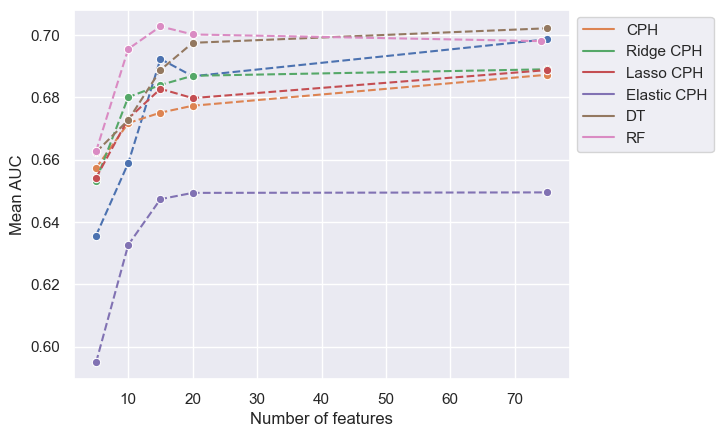

In [15]:

ax = sns.lineplot(temp,x="n_features",y='test_auc',hue='model',marker='o',linestyle ='--')
ax.set_xlabel('Number of features')
ax.set_ylabel('Mean AUC')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=model_labels,bbox_to_anchor=(1, 1), loc='upper left')
#plt.savefig("figures/model_auc_nfeatures.png",bbox_inches="tight")

# GBM

In [16]:
temp = results.query("model == 'gbm2' and n_features <=20")

C:\Users\harri\anaconda3\envs\tavi_survival\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harri\anaconda3\envs\tavi_survival\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harri\anaconda3\envs\tavi_survival\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


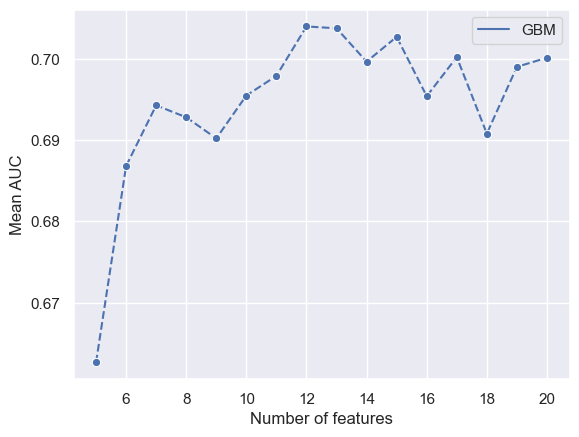

In [17]:
f, axs = plt.subplots(1, 1)
sns.lineplot(temp,x="n_features",y='test_auc',hue='model',marker='o',linestyle ='--',ax=axs)
axs.set_xlabel('Number of features')
axs.set_ylabel('Mean AUC')
handles, labels = ax.get_legend_handles_labels()
axs.legend(handles=handles, labels=['GBM'])
#plt.savefig("figures/gbm_auc_nfeatures.png",bbox_inches="tight")

In [18]:
def exponential_transformation_gender(row, column,gender_col, bounds, k=1):
    
    if row[gender_col] == 1:
        #male
        lower_bound, upper_bound = bounds["male"][0], bounds["male"][1]
    elif row[gender_col] == 0:
        lower_bound, upper_bound = bounds["female"][0], bounds["female"][1]
    else:
        return np.nan  # Unknown gender handling
    
    value = row[column]
    
    # Apply exponential transformation with scaling factor k
    if lower_bound <= value <= upper_bound:
        return 1  # Optimal range
    elif value < lower_bound:
        return np.exp(k * (lower_bound - value))  # Exponential penalty below range
    else:
        return np.exp(k * (value - upper_bound))  # Exponential penalty above range
def exponential_transformation(row, column, bounds, k=1):
    
    
    lower_bound, upper_bound = bounds[0], bounds[1]
    
    value = row[column]
    
    # Apply exponential transformation with scaling factor k
    if lower_bound <= value <= upper_bound:
        return 1  # Optimal range
    elif value < lower_bound:
        return np.exp(k * (lower_bound - value))  # Exponential penalty below range
    else:
        return np.exp(k * (value - upper_bound))  # Exponential penalty above range
def plot_auc(cph_auc,cph_mean_auc,times):
    plt.plot(times, cph_auc, "o-", label=f"Mean AUC = {cph_mean_auc:0.3f})")
    plt.axhline(cph_mean_auc, linestyle="--",color='r')
    plt.xlabel("days from enrollment")
    plt.ylabel("time-dependent AUC")
    plt.legend(loc="lower center")
    plt.grid(True)
    
from sksurv.metrics import cumulative_dynamic_auc
def calc_dyn_auc(model,X,y,y_train,time_max=365,time_interval=7):
    
    times = np.arange(1e-5, time_max, time_interval)
    chf_funcs = model.predict_cumulative_hazard_function(X)
    risk_scores = np.row_stack([chf(times) for chf in chf_funcs])
    auc, mean_auc = cumulative_dynamic_auc(y_train, y, risk_scores, times)

    return auc, mean_auc,times

In [20]:
# https://www.seslhd.health.nsw.gov.au/sites/default/files/2019-04/NSWHP%20Reference%20Ranges%20Adult%202019.pdf
train = pd.read_csv("train.csv",index_col = 0)



train['haemoglobin_adj'] = train.apply(exponential_transformation_gender, axis=1, k=2e-2,
                                      column='haemoglobin',gender_col='gender_2.0',
                                     bounds={'male':(130,170),'female':(120,150)})
train['creatinine_adj'] = train.apply(exponential_transformation_gender, axis=1, k=2e-3,
                                      column='creatinine',gender_col='gender_2.0',
                                     bounds={'male':(60,110),'female':(45,90)})
train['albumin_adj'] = train.apply(exponential_transformation, axis=1, k=1e-1,
                                      column='albumin',
                                     bounds=(33,48))
train['platelet_count_adj'] = train.apply(exponential_transformation, axis=1, k=4e-6,
                                      column='platelet_count',
                                     bounds=(150e3,450e3))
#train['inr_adj'] = train.apply(exponential_transformation, axis=1, k=0.5,
#                                      column='inr',
#                                     bounds=(0.8,1.1))

# https://cardiacmri.com/analysis-guide/aortic-valve-2/aortic-stenosis-2/ using mild as upperbound
train['av_peak_vel_adj'] = train.apply(exponential_transformation, axis=1, k=0.5,
                                      column='av_peak_vel',
                                     bounds=(1,3))

# https://cardiacmri.com/analysis-guide/aortic-valve-2/aortic-stenosis-2/ 
train['av_mean_grad_tte_adj'] = train.apply(exponential_transformation, axis=1, k=2e-2,
                                      column='av_mean_grad_tte',
                                     bounds=(0,20))

train['av_area_tte_adj'] = train.apply(exponential_transformation, axis=1, k=1,
                                      column='av_area_tte',
                                     bounds=(2,np.inf))
test = pd.read_csv("test.csv",index_col = 0)
test['haemoglobin_adj'] = test.apply(exponential_transformation_gender, axis=1, k=2e-2,
                                      column='haemoglobin',gender_col='gender_2.0',
                                     bounds={'male':(130,170),'female':(120,150)})
test['creatinine_adj'] = test.apply(exponential_transformation_gender, axis=1, k=2e-3,
                                      column='creatinine',gender_col='gender_2.0',
                                     bounds={'male':(60,110),'female':(45,90)})
test['albumin_adj'] = test.apply(exponential_transformation, axis=1, k=1e-1,
                                      column='albumin',
                                     bounds=(33,48))
test['platelet_count_adj'] = test.apply(exponential_transformation, axis=1, k=4e-6,
                                      column='platelet_count',
                                     bounds=(150e3,450e3))
#test['inr_adj'] = test.apply(exponential_transformation, axis=1, k=0.5,
#                                      column='inr',
#                                     bounds=(0.8,1.1))
test['av_peak_vel_adj'] = test.apply(exponential_transformation, axis=1, k=0.5,
                                      column='av_peak_vel',
                                     bounds=(1,3))
test['av_mean_grad_tte_adj'] = test.apply(exponential_transformation, axis=1, k=2e-2,
                                      column='av_mean_grad_tte',
                                     bounds=(0,20))

test['av_area_tte_adj'] = test.apply(exponential_transformation, axis=1, k=1,
                                      column='av_area_tte',
                                     bounds=(2,np.inf))
categorical_columns_to_keep = [
'gender_2.0', 'cad_1.0', 'prior_acute_mi_1.0', 'prior_cardio_surg_1.0',
       'prior_pci_1.0', 'prior_cabg_1.0', 'prior_valve_replace_1.0',
       'prior_bav_1.0', 'prior_af_1.0', 'prior_generator_1.0', 'prior_ccf_1.0',
       'prior_stroke_1.0', 'prior_tia_1.0', 'prior_carotid_sten_2.0',
       'prior_carotid_sten_3.0', 'prior_carotid_sten_4.0',
       'prior_carotid_sten_5.0', 'prior_pad_1.0', 'chronic_lung_2.0',
       'chronic_lung_3.0', 'chronic_lung_4.0', 'hypertension_1.0',
       'diabetes_1.0', 'ckd_1.0', 'dialysis_1.0', 'meds_ACE_ARB_1.0',
       'meds_aspirin_1.0', 'meds_p2y12_1.0', 'meds_beta_blocker_1.0',
       'meds_doac_1.0', 'meds_statins_1.0', 'meds_diuretics_1.0',
       'nyha_status_3.0', 
    'ecg_rhythm_sinus_1.0',
       'ecg_rhythm_Fibrillation_1.0', 'ecg_rhythm_paced_1.0',
       'ecg_conduct_none_1.0', 'ecg_conduct_RBBB_1.0', 'ecg_conduct_LBBB_1.0',
       'ecg_conduct_1DAVBlock_1.0', 
    'diseased_vessels_number_2.0',
       'diseased_vessels_number_3.0', 'diseased_vessels_number_4.0',
       'prox_lad_1.0', 'aortic_insuff_2.0', 'aortic_insuff_3.0',
       'aortic_insuff_4.0', 'mitral_regurg_1.0', 'av_disease_etiology_2.0',
       'valve_calc_1.0', 'annualar_calc_ctaort_1.0', 'valve_morph_1.0',
       'artery_calc_2.0', 'artery_calc_3.0',
    'artery_calc_4.0',
       'iliofem_tort_2.0', 'iliofem_tort_3.0', 'iliofem_tort_4.0',
       'high_cfa_burif_1.0', 
    #'prev_iliofem_interv_1.0', 
    'procedure_indic_1.0',
       #'valve_in_valve_1.0', 
    'anaesthesia_2.0', 'anaesthesia_4.0',
       'initial_bav_1.0'
    ] 
    #'device_manufacturer_1_2.0',
       #'device_manufacturer_1_3.0',
        #'lvef_value_scale_2.0',
#'lvef_value_scale_3.0',
#'lvef_value_scale_4.0']
cont_columns_to_keep = [
    #'haemoglobin',
    'haemoglobin_adj',
    #'platelet_count',
    'platelet_count_adj',
    #'albumin',
    'albumin_adj',
    'creatinine',
    #'creatinine_adj',
    'lvef_value',
    'av_peak_vel',	
    #'av_peak_vel_adj',
    'av_mean_grad_tte',	
    #'av_mean_grad_tte_adj',
    'av_area_tte',	
    #'av_area_tte_adj',
    'weight',
    'age',
    'kccq_summ_bl',
]
outcome_columns = ['death_in_study','upper_bound',
                       'discharge_status_new','fup_status_30d_new', 'fup_status_12mth_new','lower_bound','death_observed',
                  'event_observed', 'event_max','event_min','event_mid']

X_train = train.drop(outcome_columns,axis=1)
X_train = X_train.drop(["egfr_pre"],axis=1)

y = train[["death_in_study","event_max" ]]

records = y.to_records(index=False)
y_train = np.array(records, dtype = records.dtype.descr)


X_test = test.drop(outcome_columns,axis=1)
X_test = X_test.drop(["egfr_pre"],axis=1)
X_test = X_test[list(categorical_columns_to_keep) + cont_columns_to_keep]
#X_test = X_test.loc[:,column_list]
#X_test_scale = scaler.transform(X_test)
#X_test_scale = pd.DataFrame(X_test_scale,columns=X_test.columns,index=test.index)

y_test = test[["death_in_study","event_max" ]]

records = y_test.to_records(index=False)
y_test = np.array(records, dtype = records.dtype.descr)

In [55]:

print(df.shape)
print(train.shape)
print(test.shape)

(16123, 129)
(12898, 113)
(3225, 113)


In [21]:
model = pickle.load(open("model/gbm2_{}_nfeatures{}.pkl".format(today_stf,12),"rb"))
chosen_model = model.best_estimator_

In [22]:
auc, mean_auc,times = calc_dyn_auc(chosen_model,X_test[chosen_model.feature_names_in_],y_test,y_train,365,7)

C:\Users\harri\AppData\Local\Temp\ipykernel_9972\868260419.py:1: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(times, auc, "o-",linestyle="--")


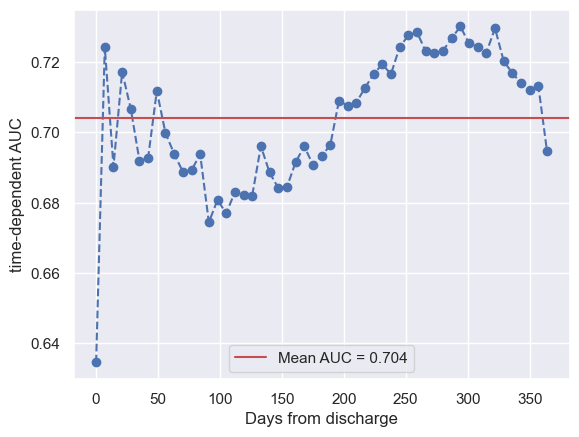

In [23]:
plt.plot(times, auc, "o-",linestyle="--")
plt.axhline(mean_auc, linestyle="-",color='r', label=f"Mean AUC = {mean_auc:0.3f}")
plt.xlabel("Days from discharge")
plt.ylabel("time-dependent AUC")
plt.legend(loc="lower center")
#plt.savefig("figures/gbm_dynamic_auc.png",bbox_inches="tight")

### Survival plot

In [24]:
survival_times = model.best_estimator_.predict_survival_function(X_test.loc[[394,12648],chosen_model.feature_names_in_])

C:\Users\harri\anaconda3\envs\tavi_survival\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harri\anaconda3\envs\tavi_survival\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harri\anaconda3\envs\tavi_survival\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harri\anaconda3\envs\tavi_survival\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

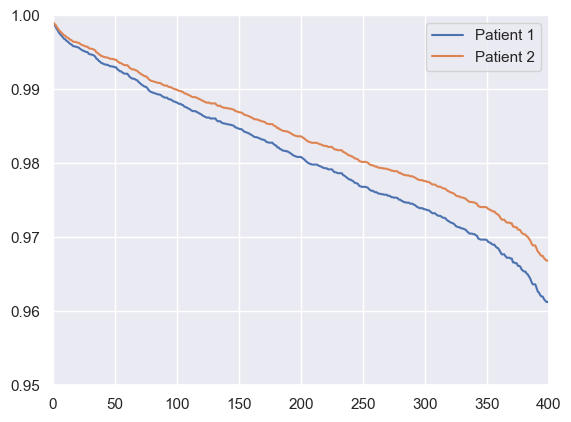

In [27]:
ax = sns.lineplot(x=survival_times[0].x,y=survival_times[0].y,label='Patient 1')
ax = sns.lineplot(x=survival_times[1].x,y=survival_times[1].y,label='Patient 2')
ax.set_xlim([0,400])
ax.set_ylim([0.95,1])
plt.savefig("figures/gbm_patient_survival_curve.png",bbox_inches="tight")

## Feature importance

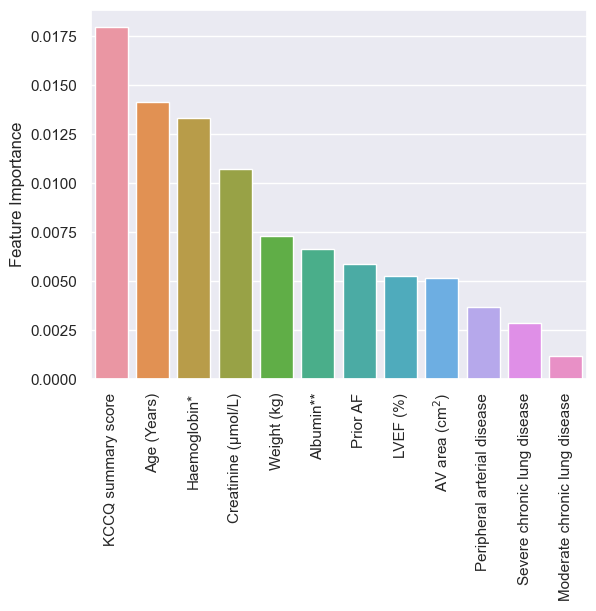

In [53]:
gbm_feature_importance = pd.read_csv("results/gbm2_feature_importance_{}.csv".format(today_stf),index_col=0)
non_zero_rf_fi = gbm_feature_importance.head(12)
ax = sns.barplot(non_zero_rf_fi, y = 'importances_mean',x=non_zero_rf_fi.index)
temp = plt.setp(ax.get_xticklabels(), rotation=90,horizontalalignment = 'center')
ax.set_ylabel('Feature Importance')
ax.set_xticklabels(['KCCQ summary score','Age (Years)','Haemoglobin*','Creatinine (μmol/L)','Weight (kg)',
                   'Albumin**','Prior AF','LVEF (%)',
                   'AV area (cm$^2$)','Peripheral arterial disease','Severe chronic lung disease',
                   'Moderate chronic lung disease'])
plt.savefig("figures/gbm_coeff_plot.png",bbox_inches="tight")